In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install filetype

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pytesseract
import filetype
from google.colab.patches import cv2_imshow

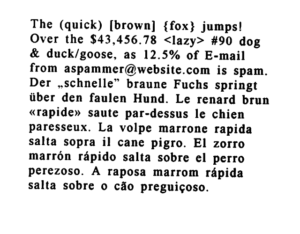

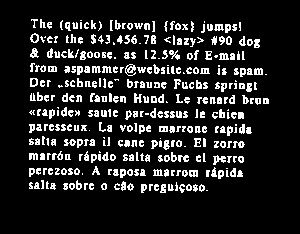

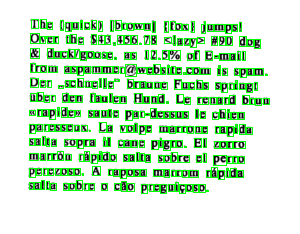

The (quick) [brown] {fox} jumps!
Over the $43,456.78 <lazy> #90 dog
& duck/goose. as 12.5% of E-mail
from aspammer@website.com is spam.
Der .schnelle” braune Fuchs springt
ber den fanten Hund. Le renard bron
capide» saute par-dessus Je chien
paresseux. La volpe marcone rapide
sala sopra il cane pigto. El zorro
marrén rapido salta sobre el perco
perezoso. A raposa marrom rapide
Salta sobre 0 c8¢ preguigoso.



In [ ]:
def save_bounding_boxes(target_image):

  cv2_imshow(target_image)

  gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
  bb_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(bb_image)

  # Draw bounding boxes
  cnts = cv2.findContours(bb_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  # Start coordinate, here (5, 5)
  # represents the top left corner of rectangle
  start_point = (5, 5)
  
  # Ending coordinate, here (220, 220)
  # represents the bottom right corner of rectangle
  end_point = (220, 220)

  color = (0, 255, 0)
  bb = 0

  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      cv2.rectangle(target_image, (x, y), (x + w, y + h), color, 1)
      roi = target_image[y:y+h, x:x+w]

      letters_path = '/content/drive/MyDrive/Templates/TC Letters/'
      letters_file_name = letters_path + str(bb) + '.jpg'
      cv2.imwrite(letters_file_name, roi)
      bb += 1
   

  # OCR
  ocr_text = pytesseract.image_to_string(255 - bb_image, lang='eng',config='--psm 6')

  #cv2_imshow(bb_image)
  cv2_imshow(target_image)
  return ocr_text
 
 
target_image = cv2.imread('/content/drive/MyDrive/T & C Template Match 1623/Targets/eurotext-300x234.png')
ocr_text = save_bounding_boxes(target_image)
print(ocr_text)
